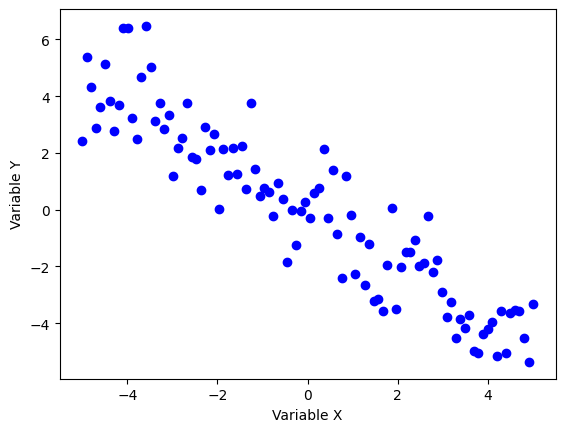

In [1]:
# Importación de librerías
from numpy import mean, std
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Definición de un dataset con solo 1 feature (1 variable X)
X = np.linspace(-5 , 5, 100).reshape(100, 1)
y_limpia = np.sin(3 * X) - X
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

Los mejores hiperparámetros son: {'eta': 0.3, 'lambda': 1.0, 'max_depth': 3}
La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 0.64


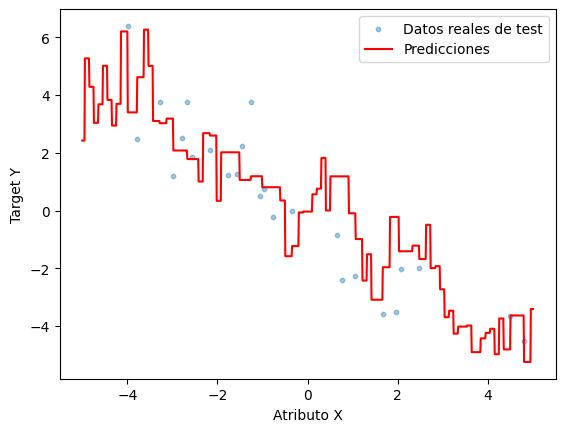

In [2]:
# División en dos datasets: train (con el que se optimizan los hiperparámetros) y test (con el que se prueba el rendimiento del modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Obtención del mejor parámetro de profundidad del árbol entre 3 y 7 usando la validación cruzada y GridSearch
regr = xgb.XGBRegressor()
params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3, 7]}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, y_train)
print('Los mejores hiperparámetros son: {}'.format(regr_opt.best_params_))
y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()